In [26]:
using PyPlot
using LsqFit

In [27]:
data1 = readdlm("ttv_planet1.txt")
data2 = readdlm("ttv_planet2.txt") ;

In [28]:
times1 = reshape(data1, length(data1))
times2 = reshape(data2, length(data2))

24-element Array{Float64,1}:
  8461.76
  8827.02
  9192.27
  9557.53
  9922.79
 10288.0 
 10653.3 
 11018.6 
 11383.8 
 11749.1 
 12114.3 
 12479.6 
 12844.8 
 13210.1 
 13575.4 
 13940.6 
 14305.9 
 14671.1 
 15036.4 
 15401.6 
 15766.9 
 16132.1 
 16497.4 
 16862.7 

In [29]:
function period(times)
    dt = zeros(length(times)-1)
    for i in range(1, length(times)-1)
        dt[i] = times[i+1] - times[i]
    end
    return mean(dt)
end

period (generic function with 1 method)

In [30]:
println(period(times1))
println(period(times2))

224.

In [31]:
include("/Users/mlazz/Dropbox/UW/Spring2016/ASTR598/ExoJulia/Homework/hw4/compute_ttv.jl")

TTVFaster

70076641863517
365.25630708152175


In [32]:
function ttv_wrapper(time1, time2, p)
    #Parameters for planet 1
    mass_ratio1 = p[1]
    per1 = p[2]
    trans01 = p[3]
    ecosw1 = p[4]
    esinw1 = p[5]
    
    #Paramters for planet 2
    mass_ratio2 = p[6]
    per2 = p[7]
    trans02 = p[8]
    ecosw2 = p[9]
    esinw2 = p[10]
    
    #Make planets using TTVFaster.planet_planet.hk
    planet1 = TTVFaster.Planet_plane_hk(mass_ratio1, per1, trans01, ecosw1, esinw1)
    planet2 = TTVFaster.Planet_plane_hk(mass_ratio2, per2, trans02, ecosw2, esinw2)
    
    #Make empty arrays for ttv1 and ttv2 that will be created in the computer_ttv! function
    ttv1 = zeros(length(time1))
    ttv2 = zeros(length(time2))
    
    #Feed things into compute_ttv function
    jmax = 3
    TTVFaster.compute_ttv!(jmax, planet1, planet2, time1, time2, ttv1, ttv2)
    
    return ttv1, ttv2
end

ttv_wrapper (generic function with 1 method)

In [33]:
params = [0.001, period(times1), 1, 0.05, 0.05, 0.001, period(times2), 1, 0.05, 0.05]
ttv1, ttv2 = ttv_wrapper(times1, times2, params)

([-0.671551,-0.742688,1.08516,1.08058,-0.0241001,-1.14731,-1.10195,0.841777,0.80765,-0.0757908  …  1.05254,1.03239,-0.0302539,-1.17386,-1.11549,0.890491,0.881702,-0.0539386,-0.124272,-0.274827],[0.0181127,-0.185097,0.196186,-0.594433,0.175193,0.787703,-0.403506,-0.0002125,0.0552324,-0.196426  …  -0.410434,0.0101813,0.0926556,-0.20736,0.147969,-0.590079,0.162153,0.783572,-0.417489,0.0210003])

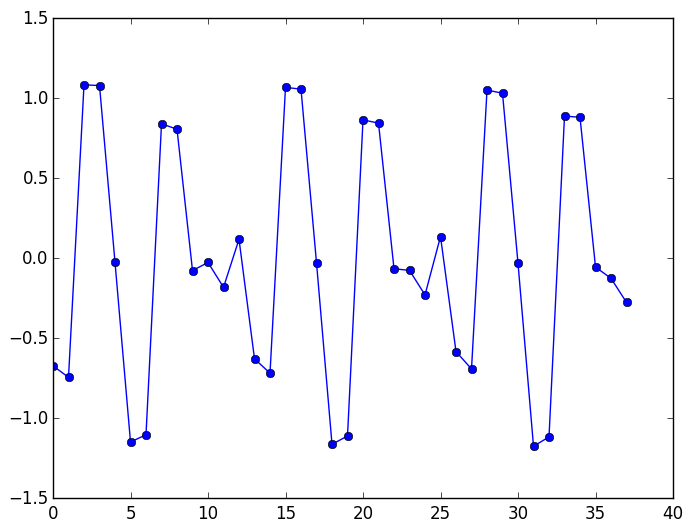

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x312c56310>

In [36]:
plot(ttv1, "o-")

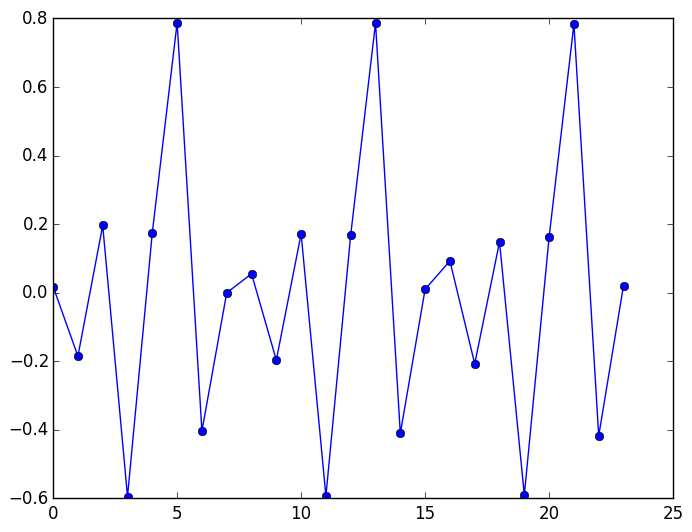

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3105b4710>

In [37]:
plot(ttv2, "o-")